In [ ]:
import tensorflow as tf
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip downloaded file
zip_ref = zipfile.ZipFile("nlp_getting_started.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-12 01:49:49--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 173.194.213.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-09-12 01:49:49 (93.4 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
len(train_df)

7613

In [ ]:
len(test_df)

3263

In [ ]:
train_df_shuffled = train_df.sample(frac=1,random_state=42)

In [ ]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels ,val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                           train_df_shuffled['target'].to_numpy(),
                                                                           test_size=0.1,
                                                                           random_state=42)

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:

# default setting
text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize='lower_and_strip_punctuation',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

# our setting

max_length = 15 # average no. of words per tweet
max_vocabulary_length =10000 # total no. of distinct words assumed in total

text_vectorizer = TextVectorization(max_tokens = max_vocabulary_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence_1 = train_df['text'][452]

In [ ]:
text_vectorizer([sample_sentence_1])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[5337, 1091,   87,  156,   17,  312,  393,   16,  111,   17,  506,
         426,    1,    1,    0]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()

In [ ]:
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
words_in_vocab[-10:]

['painthey',
 'painful',
 'paine',
 'paging',
 'pageshi',
 'pages',
 'paeds',
 'pads',
 'padres',
 'paddytomlinson1']

In [ ]:
# creating a embedding layer

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocabulary_length,
                             output_dim=128,
                             input_length=max_length)

In [ ]:
sample_embed = embedding(text_vectorizer([sample_sentence_1]))
#sample_embed

In [ ]:
sample_embed.shape

TensorShape([1, 15, 128])

In [ ]:
from keras.api._v2.keras import activations
#build model with funational api

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Conv1D(64,5,activation='relu')(x)
#x = layers.Conv1D(8,2,activation='relu')(x)
#x = layers.MaxPooling1D()(x)
#x = layers.Conv1D(8,2,activation='relu')(x)
#x = layers.Conv1D(8,2,activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
#x = layers.Dense(10,activation=tf.keras.activations.relu)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs,outputs,name='model_1_dense')

#compile model

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 6s 24ms/step - loss: 0.5424 - accuracy: 0.7308 - val_loss: 0.4681 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3297 - accuracy: 0.8664 - val_loss: 0.4905 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2050 - accuracy: 0.9242 - val_loss: 0.5399 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1275 - accuracy: 0.9565 - val_loss: 0.6356 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0907 - accuracy: 0.9693 - val_loss: 0.7493 - val_accuracy: 0.7730


<Axes: >

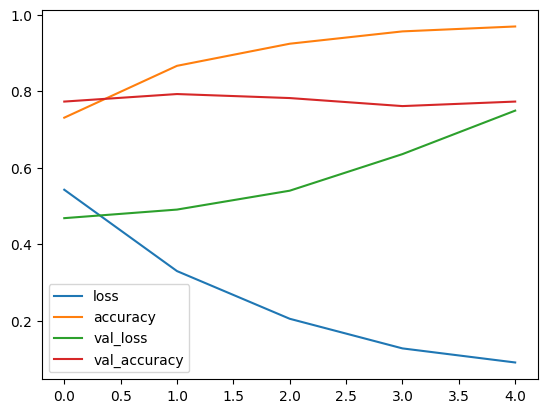

In [ ]:
pd.DataFrame(model_1_history.history).plot()

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)               

In [ ]:
val_labels.shape

(762,)

In [ ]:
train_sentences.shape

(6851,)

In [ ]:
# downloading pretrained-embedder as a keras layer

import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

In [ ]:
# creating model using Sequential api

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(32),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

#compile it

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])

#sumamry
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_17 (Dense)            (None, 32)                16416     
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 256814273 (979.67 MB)
Trainable params: 16449 (64.25 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
#fit the model

model_6_history = model_6.fit(train_sentences[:1000],
            train_labels[:1000],
            epochs=10,
            validation_data = (val_sentences,val_labels))

Epoch 1/10
32/32 [==============================] - 2s 35ms/step - loss: 0.5266 - accuracy: 0.7640 - val_loss: 0.4860 - val_accuracy: 0.7703
Epoch 2/10
32/32 [==============================] - 1s 20ms/step - loss: 0.3848 - accuracy: 0.8320 - val_loss: 0.4950 - val_accuracy: 0.7756
Epoch 3/10
32/32 [==============================] - 1s 22ms/step - loss: 0.3354 - accuracy: 0.8630 - val_loss: 0.5367 - val_accuracy: 0.7664
Epoch 4/10
32/32 [==============================] - 1s 21ms/step - loss: 0.2949 - accuracy: 0.8820 - val_loss: 0.5623 - val_accuracy: 0.7625
Epoch 5/10
32/32 [==============================] - 1s 21ms/step - loss: 0.2554 - accuracy: 0.8960 - val_loss: 0.5961 - val_accuracy: 0.7690
Epoch 6/10
32/32 [==============================] - 1s 22ms/step - loss: 0.2160 - accuracy: 0.9200 - val_loss: 0.6573 - val_accuracy: 0.7651
Epoch 7/10
32/32 [==============================] - 1s 18ms/step - loss: 0.1908 - accuracy: 0.9290 - val_loss: 0.6564 - val_accuracy: 0.7572
Epoch 8/10
32

<Axes: >

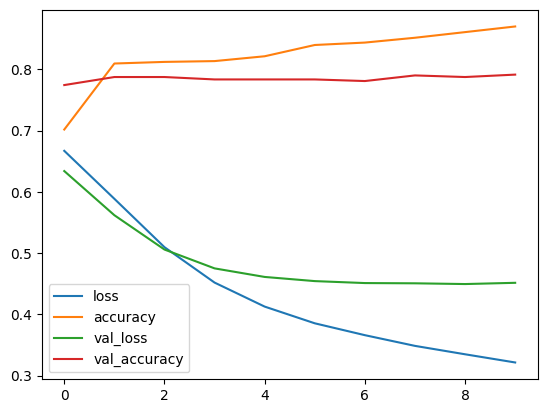

In [ ]:
pd.DataFrame(model_6_history.history).plot()

In [ ]:
# create subsets of 10% of training data

sampled_train_data=train_df.sample(frac=0.1,
                random_state=43)

In [ ]:
train_sentences_10_percent, train_labels_10_percent = list(sampled_train_data.text), list(sampled_train_data.target)

In [ ]:
len(train_sentences)

6851